## 모듈과 데이터 불러오기

In [253]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import seaborn as sns


In [254]:
np.random.seed(222)

In [255]:
# 바꿀 것!
working_dir = os.path.join("/content/drive/MyDrive/walkmodel", "PCA1") # 바꿀 것 

if os.path.exists(working_dir):
    print("{} -- Folder already exists \n".format(working_dir))
else:
    os.makedirs(working_dir, exist_ok=True)
    print("{} -- Folder create complete \n".format(working_dir))

os.chdir(working_dir)
os.listdir()

/content/drive/MyDrive/walkmodel/PCA1 -- Folder already exists 



[]

In [256]:
DATA_IN_PATH = os.path.join("/content/drive/MyDrive/walkmodel")
#DATA_OUT_PATH = os.path.join("/content/drive/MyDrive/walkmodel")
DATA_OUT_PATH = working_dir

In [257]:
Cfile_list = glob.glob(os.path.join(DATA_IN_PATH,'data/train','*.C.csv'))
NCfile_list = glob.glob(os.path.join(DATA_IN_PATH,'data/train','*NC.csv'))
Afile_list = glob.glob(os.path.join(DATA_IN_PATH,'data/train','*.csv'))

print(len(Cfile_list),Cfile_list)
print(len(NCfile_list),NCfile_list)
print(len(Afile_list),Afile_list)

9 ['/content/drive/MyDrive/walkmodel/data/train/2021-03-2221.C.csv', '/content/drive/MyDrive/walkmodel/data/train/2021-03-2513.55.50.C.csv', '/content/drive/MyDrive/walkmodel/data/train/2021-03-2516.39.49.C.csv', '/content/drive/MyDrive/walkmodel/data/train/2021-03-2517.14.36.C.csv', '/content/drive/MyDrive/walkmodel/data/train/2021-03-3120.38.23.C.csv', '/content/drive/MyDrive/walkmodel/data/train/2021-04-0121.04.26.C.csv', '/content/drive/MyDrive/walkmodel/data/train/2021-04-0520.35.41.C.csv', '/content/drive/MyDrive/walkmodel/data/train/SH_2021-04-0515.10.37 youtube.C.csv', '/content/drive/MyDrive/walkmodel/data/train/HE_2021-04-0714.07.38.C.csv']
10 ['/content/drive/MyDrive/walkmodel/data/train/2021-03-2221.27.NC.csv', '/content/drive/MyDrive/walkmodel/data/train/2021-03-2514.39.06.NC.csv', '/content/drive/MyDrive/walkmodel/data/train/2021-03-2517.08.22.NC.csv', '/content/drive/MyDrive/walkmodel/data/train/2021-03-3114.16.31.NC.csv', '/content/drive/MyDrive/walkmodel/data/train/202

In [258]:
# 이용 데이터 기록용 print

def mknamelist(filelist):
  x=pd.Series(filelist)
  x=x.str.replace('/content/drive/MyDrive/walkmodel/data/train','')
  return x.values

Cfilename = mknamelist(Cfile_list)
NCfilename = mknamelist(NCfile_list)
Afilename = mknamelist(Afile_list)

print("파일갯수:",len(Cfilename),"파일명:",Cfilename)
print("파일갯수:",len(NCfilename),"파일명:",NCfilename)
print("파일갯수:",len(Afilename),"파일명:",Afilename)

파일갯수: 9 파일명: ['/2021-03-2221.C.csv' '/2021-03-2513.55.50.C.csv'
 '/2021-03-2516.39.49.C.csv' '/2021-03-2517.14.36.C.csv'
 '/2021-03-3120.38.23.C.csv' '/2021-04-0121.04.26.C.csv'
 '/2021-04-0520.35.41.C.csv' '/SH_2021-04-0515.10.37 youtube.C.csv'
 '/HE_2021-04-0714.07.38.C.csv']
파일갯수: 10 파일명: ['/2021-03-2221.27.NC.csv' '/2021-03-2514.39.06.NC.csv'
 '/2021-03-2517.08.22.NC.csv' '/2021-03-3114.16.31.NC.csv'
 '/2021-03-3115.56.08.NC.csv' '/2021-03-3118.51.43.NC.csv'
 '/2021-04-0112.53.21.NC.csv' '/2021-04-0513.36.57.NC.csv'
 '/2021-04-0516.16.55.NC.csv' '/SH_2021-04-0515.09.36 webtoon.NC.csv']
파일갯수: 19 파일명: ['/2021-03-2221.27.NC.csv' '/2021-03-2221.C.csv'
 '/2021-03-2513.55.50.C.csv' '/2021-03-2514.39.06.NC.csv'
 '/2021-03-2516.39.49.C.csv' '/2021-03-2517.08.22.NC.csv'
 '/2021-03-2517.14.36.C.csv' '/2021-03-3114.16.31.NC.csv'
 '/2021-03-3115.56.08.NC.csv' '/2021-03-3118.51.43.NC.csv'
 '/2021-03-3120.38.23.C.csv' '/2021-04-0112.53.21.NC.csv'
 '/2021-04-0121.04.26.C.csv' '/2021-04-0513.36.57

In [259]:
sensor_c = []
sensor_nc = []

for file in Cfile_list:
  df=pd.read_csv(file)
  sensor_c.append(df)

for file in NCfile_list:
  df=pd.read_csv(file)
  sensor_nc.append(df)

In [260]:
sensor_c = pd.concat(sensor_c, axis=0, ignore_index=True)
sensor_nc = pd.concat(sensor_nc, axis=0, ignore_index=True)

print(sensor_c.shape)
print(sensor_nc.shape)

(1470, 15)
(992, 15)


In [261]:
# validation load
Vfile_list = glob.glob(os.path.join(DATA_IN_PATH,'data/validation','*.csv'))

print(len(Vfile_list),Vfile_list)

4 ['/content/drive/MyDrive/walkmodel/data/validation/sensor_v1.csv', '/content/drive/MyDrive/walkmodel/data/validation/sensor_v2.csv', '/content/drive/MyDrive/walkmodel/data/validation/sensor_v3.csv', '/content/drive/MyDrive/walkmodel/data/validation/sensor_v4.csv']


In [262]:
Vfilename = mknamelist(Vfile_list)

print("파일갯수:",len(Vfilename),"파일명:",Vfilename)

파일갯수: 4 파일명: ['/content/drive/MyDrive/walkmodel/data/validation/sensor_v1.csv'
 '/content/drive/MyDrive/walkmodel/data/validation/sensor_v2.csv'
 '/content/drive/MyDrive/walkmodel/data/validation/sensor_v3.csv'
 '/content/drive/MyDrive/walkmodel/data/validation/sensor_v4.csv']


In [263]:
sensor_v = []

for file in Vfile_list:
  df=pd.read_csv(file)
  sensor_v.append(df)

sensor_v = pd.concat(sensor_v, axis=0, ignore_index=True)
print(sensor_v.shape)

(1683, 15)


Physics Toolbox 데이터 변수 설명  
중력가속도 : gFx, gFy, gFz  
리니어 가속도 : ax, ay, az  
자이로스코프 : wx, wy, wz  
자력 : Bx, By, Bz  
광도 : l  

## 데이터 전처리

In [264]:
sensor_c = sensor_c.rename({'Unnamed: 14':'info'}, axis='columns')
sensor_c['info'] = 1

sensor_nc = sensor_nc.rename({'Unnamed: 14':'info'}, axis='columns')
sensor_nc['info'] = 0

In [265]:
sensor_c.head()

,time,gFx,gFy,gFz,ax,ay,az,wx,wy,wz,Bx,By,Bz,I,info
0,1.025,-0.0454,0.3281,0.8490,-0.5783,0.2102,-1.0187,0.0154,0.4074,0.6974,662.34,-867.78,-1829.3400,171.0,1
1,2.026,0.0332,0.3970,0.8864,-0.0702,0.2157,-0.4098,0.1033,-0.1289,-0.1749,665.76,-870.60,-1829.3999,119.0,1
2,3.025,0.1368,0.5280,0.8707,0.5674,0.6999,-0.1590,-0.0671,0.0452,0.0541,657.18,-876.90,-1824.2999,68.0,1
3,4.02,-0.1959,0.4566,0.8206,-1.3578,-0.2973,-0.6029,-0.0091,-0.7318,-0.8041,682.92,-878.46,-1817.7600,136.0,1
4,5.021,0.1683,0.5844,0.7916,1.1559,0.3176,-0.3827,0.6409,0.1417,0.2844,694.62,-878.16,-1815.4199,76.0,1


In [266]:
sensor_a = pd.concat([sensor_c,sensor_nc], axis=0 , ignore_index=True)

print(sensor_c.shape)
print(sensor_nc.shape)
print(sensor_a.shape)

(1470, 15)
(992, 15)
(2462, 15)


In [267]:
sensor_a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2462 entries, 0 to 2461
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   time    2462 non-null   object 
 1   gFx     2462 non-null   float64
 2   gFy     2462 non-null   float64
 3   gFz     2462 non-null   float64
 4   ax      2462 non-null   float64
 5   ay      2462 non-null   float64
 6   az      2462 non-null   float64
 7   wx      2462 non-null   float64
 8   wy      2462 non-null   float64
 9   wz      2462 non-null   float64
 10  Bx      2462 non-null   float64
 11  By      2462 non-null   float64
 12  Bz      2462 non-null   float64
 13  I       2462 non-null   float64
 14  info    2462 non-null   int64  
dtypes: float64(13), int64(1), object(1)
memory usage: 288.6+ KB


In [268]:
sensor_v.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1683 entries, 0 to 1682
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   time    1683 non-null   object 
 1   gFx     1683 non-null   float64
 2   gFy     1683 non-null   float64
 3   gFz     1683 non-null   float64
 4   ax      1683 non-null   float64
 5   ay      1683 non-null   float64
 6   az      1683 non-null   float64
 7   wx      1683 non-null   float64
 8   wy      1683 non-null   float64
 9   wz      1683 non-null   float64
 10  Bx      1683 non-null   float64
 11  By      1683 non-null   float64
 12  Bz      1683 non-null   float64
 13  I       1683 non-null   float64
 14  info    1683 non-null   float64
dtypes: float64(14), object(1)
memory usage: 197.4+ KB


In [269]:
sensor_v.head()

,time,gFx,gFy,gFz,ax,ay,az,wx,wy,wz,Bx,By,Bz,I,info
0,22:26:02:167,0.0992,0.5605,0.7757,0.0232,-0.6028,-0.0217,0.0955,-0.0943,-0.8174,-31.86,-16.80,-13.20,25.0,1.0
1,22:26:03:165,0.1786,0.7207,0.7430,0.9049,0.7469,-0.1729,-0.2344,-0.0509,0.0861,-31.80,-13.56,-15.36,49.0,1.0
2,22:26:04:166,-0.0432,0.5614,0.6228,-0.6806,-1.1467,-1.1010,0.3465,0.1732,0.5021,-27.66,-25.50,-10.26,125.0,1.0
3,22:26:05:160,-0.1048,0.6914,0.6645,-1.2183,0.0486,-0.6205,-0.0090,0.0437,-0.3953,-25.26,-29.52,-7.02,164.0,1.0
4,22:26:06:160,0.2558,0.6203,0.5263,1.6478,-1.4944,-1.0133,0.9941,-0.1151,-0.6714,-29.16,-23.58,-8.76,146.0,1.0


In [270]:
sensor_v['info'] = sensor_v['info'].astype(int)

In [271]:
sensor_v.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1683 entries, 0 to 1682
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   time    1683 non-null   object 
 1   gFx     1683 non-null   float64
 2   gFy     1683 non-null   float64
 3   gFz     1683 non-null   float64
 4   ax      1683 non-null   float64
 5   ay      1683 non-null   float64
 6   az      1683 non-null   float64
 7   wx      1683 non-null   float64
 8   wy      1683 non-null   float64
 9   wz      1683 non-null   float64
 10  Bx      1683 non-null   float64
 11  By      1683 non-null   float64
 12  Bz      1683 non-null   float64
 13  I       1683 non-null   float64
 14  info    1683 non-null   int64  
dtypes: float64(13), int64(1), object(1)
memory usage: 197.4+ KB


In [272]:
sensor_v.head()

,time,gFx,gFy,gFz,ax,ay,az,wx,wy,wz,Bx,By,Bz,I,info
0,22:26:02:167,0.0992,0.5605,0.7757,0.0232,-0.6028,-0.0217,0.0955,-0.0943,-0.8174,-31.86,-16.80,-13.20,25.0,1
1,22:26:03:165,0.1786,0.7207,0.7430,0.9049,0.7469,-0.1729,-0.2344,-0.0509,0.0861,-31.80,-13.56,-15.36,49.0,1
2,22:26:04:166,-0.0432,0.5614,0.6228,-0.6806,-1.1467,-1.1010,0.3465,0.1732,0.5021,-27.66,-25.50,-10.26,125.0,1
3,22:26:05:160,-0.1048,0.6914,0.6645,-1.2183,0.0486,-0.6205,-0.0090,0.0437,-0.3953,-25.26,-29.52,-7.02,164.0,1
4,22:26:06:160,0.2558,0.6203,0.5263,1.6478,-1.4944,-1.0133,0.9941,-0.1151,-0.6714,-29.16,-23.58,-8.76,146.0,1


In [273]:
# # 임시 test 셋 생성
# from sklearn.model_selection import train_test_split

# train, test = train_test_split(sensor_a, test_size=0.3, random_state=222)

In [274]:
# # 훈련 데이터를 7:3 으로 쪼개서 모델 평가
# X_train = train.drop(['time','info'],axis=1)
# X_test = test.drop(['time','info'],axis=1)

# Y_train = train['info']
# Y_test = test['info']

In [275]:
# # validation 으로 모델 평가
# alltrain = sensor_a.copy()

#X_alltrain  = alltrain.drop(['time','info'],axis=1)
X_valid = sensor_v.drop(['time','info'],axis=1)

#Y_alltrain = alltrain['info']
Y_valid = sensor_v['info']

In [276]:
print(sensor_c.shape)
print(sensor_nc.shape)
print(sensor_a.shape)
print(sensor_v.shape)

(1470, 15)
(992, 15)
(2462, 15)
(1683, 15)


# PCA1  
광센서를 제거한 버전, train 데이터 이용

Physics Toolbox 데이터 변수 설명  
중력가속도 : gFx, gFy, gFz  
리니어 가속도 : ax, ay, az  
자이로스코프 : wx, wy, wz  
자력 : Bx, By, Bz  
광도 : l  

In [277]:
# 광센서는 제거한 버전

X_train =  sensor_a.drop(['time','I','info'], axis=1)
X_valid =  sensor_v.drop(['time','I','info'], axis=1)

Y_train = sensor_a['info']
Y_valid = sensor_v['info']

Text(0, 0.5, 'Cumulative explained variance')

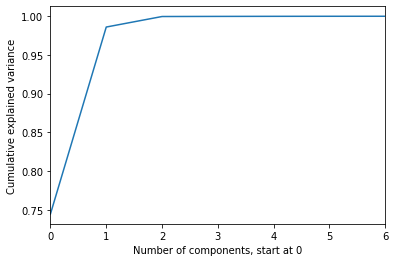

In [278]:
from sklearn.decomposition import PCA

pca = PCA(random_state=222)

pca_components = pca.fit_transform(X_train)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,6,1)
plt.xlabel('Number of components, start at 0')
plt.ylabel('Cumulative explained variance')

Text(0, 0.5, 'Cumulative explained variance')

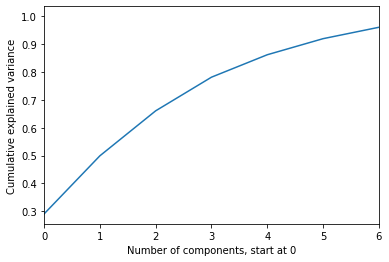

In [279]:
from sklearn.preprocessing import StandardScaler

X_scaled = StandardScaler().fit_transform(X_train)

pca = PCA(random_state=222)

pca_components = pca.fit_transform(X_scaled)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,6,1)
plt.xlabel('Number of components, start at 0')
plt.ylabel('Cumulative explained variance')

## 스케일링 없이 주성분으로 이루어진 데이터프레임 생성 과 그래프

In [280]:
pca = PCA(n_components = 2, random_state=222)

pca_components = pca.fit_transform(X_train)

principalDf = pd.DataFrame(data = pca_components
             , columns = ['principal component 1', 'principal component 2'])

finalDataFrame = pd.concat([principalDf, Y_train], axis=1)

In [281]:
pca2 = PCA(n_components = 3, random_state=222)

pca_components2 = pca2.fit_transform(X_train)

principalDf2 = pd.DataFrame(data = pca_components2
             , columns = ['principal component 1', 'principal component 2', 'principal component 3'])

finalDataFrame2 = pd.concat([principalDf2, Y_train], axis=1)

In [282]:
print(finalDataFrame.shape)
print(finalDataFrame2.shape)
print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_))
print(pca2.explained_variance_ratio_)
print(sum(pca2.explained_variance_ratio_))

(2462, 3)
(2462, 4)
[0.74459499 0.24145448]
0.9860494613770897
[0.74459499 0.24145448 0.01359902]
0.9996484793373359


In [283]:
finalDataFrame.head()

,principal component 1,principal component 2,info
0,1870.971676,873.668117,1
1,1871.567016,877.853959,1
2,1866.054159,879.092315,1
3,1862.278108,894.922230,1
4,1861.121957,901.202318,1


In [284]:
finalDataFrame2.head()

,principal component 1,principal component 2,principal component 3,info
0,1870.971676,873.668117,9.603392,1
1,1871.567016,877.853959,10.915351,1
2,1866.054159,879.092315,0.543952,1
3,1862.278108,894.922230,21.649516,1
4,1861.121957,901.202318,31.572700,1


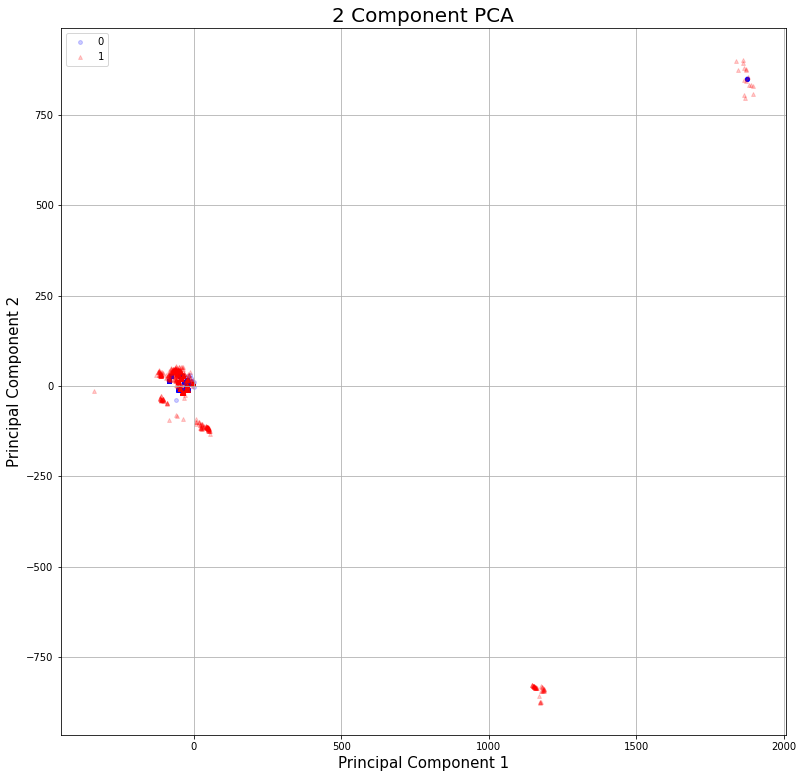

In [285]:
labels = [0,1]
colors = ['b', 'r']
markers = ['o', '^']



fig = plt.figure(figsize = (13,13))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)

for label, color, marker in zip(labels, colors, markers):
  indicesToKeep = finalDataFrame['info'] == label
  ax.scatter(finalDataFrame.loc[indicesToKeep, 'principal component 1']
               , finalDataFrame.loc[indicesToKeep, 'principal component 2']
               , c = color
               , alpha = 0.2
               , marker = marker
               , s = 15)

ax.legend(labels)
ax.grid()

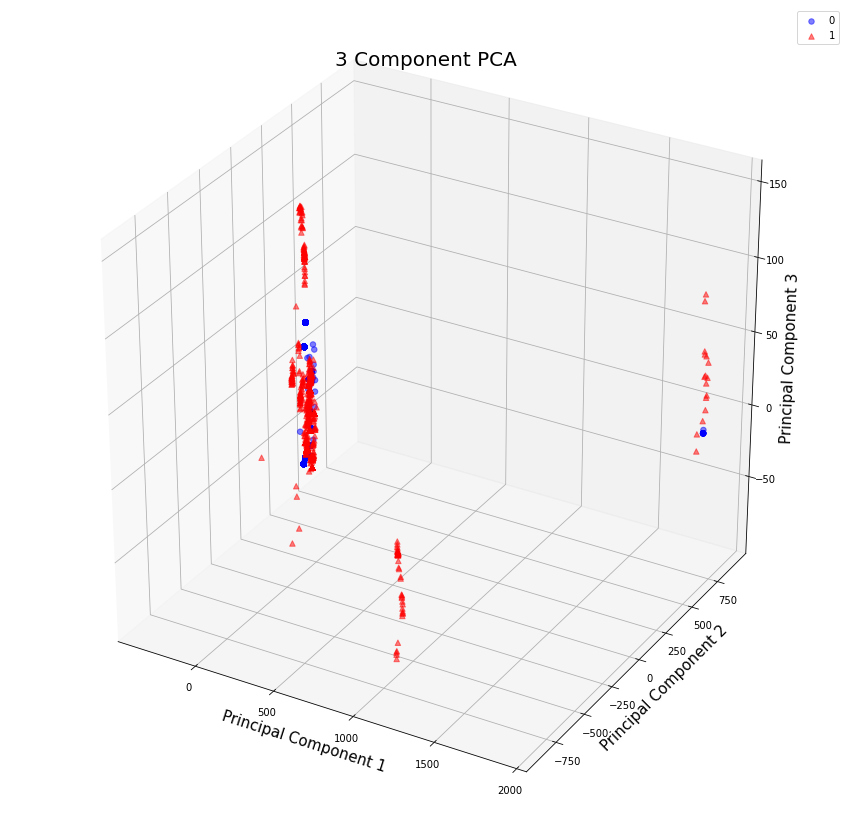

In [286]:
from mpl_toolkits.mplot3d import Axes3D

fig2 = plt.figure(figsize=(15,15))
ax2 = fig2.add_subplot(111, projection='3d')

ax2.set_xlabel('Principal Component 1', fontsize = 15)
ax2.set_ylabel('Principal Component 2', fontsize = 15)
ax2.set_zlabel('Principal Component 3', fontsize = 15)
ax2.set_title('3 Component PCA', fontsize = 20)

labels = [0,1]
colors = ['b', 'r']
markers = ['o', '^']

for label, color, marker in zip(labels, colors, markers):
  indicesToKeep = finalDataFrame2['info'] == label
  ax2.scatter(finalDataFrame2.loc[indicesToKeep, 'principal component 1']
               , finalDataFrame2.loc[indicesToKeep, 'principal component 2']
               , finalDataFrame2.loc[indicesToKeep, 'principal component 3']
               , c = color
               , marker=marker
               , alpha = 0.5
               , s = 30)

ax2.legend(labels)
ax2.grid()

## 스케일링 후 주성분으로 이루어진 데이터프레임 생성 과 그래프

In [287]:
from sklearn.preprocessing import StandardScaler

X_scaled = StandardScaler().fit_transform(X_train)
X_valid_scaled = StandardScaler().fit_transform(X_valid)

In [288]:
pca = PCA(n_components = 2, random_state=222)

pca_components = pca.fit_transform(X_scaled)

principalDf = pd.DataFrame(data = pca_components
             , columns = ['principal component 1', 'principal component 2'])

finalDataFrame = pd.concat([principalDf, Y_train], axis=1)

In [289]:
pca2 = PCA(n_components = 3, random_state=222)

pca_components2 = pca2.fit_transform(X_scaled)

principalDf2 = pd.DataFrame(data = pca_components2
             , columns = ['principal component 1', 'principal component 2', 'principal component 3'])

finalDataFrame2 = pd.concat([principalDf2, Y_train], axis=1)

In [290]:
print(finalDataFrame.shape)
print(finalDataFrame2.shape)
print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_))
print(pca2.explained_variance_ratio_)
print(sum(pca2.explained_variance_ratio_))

(2462, 3)
(2462, 4)
[0.29084294 0.20843405]
0.4992769841146211
[0.29084294 0.20843405 0.16142335]
0.6607003369707108


In [291]:
finalDataFrame.head()

,principal component 1,principal component 2,info
0,0.445274,-1.406947,1
1,0.687024,-1.699507,1
2,0.683604,-1.783200,1
3,1.184863,-1.670784,1
4,0.393516,-1.883390,1


In [292]:
finalDataFrame2.head()

,principal component 1,principal component 2,principal component 3,info
0,0.445274,-1.406947,11.262165,1
1,0.687024,-1.699507,11.271465,1
2,0.683604,-1.783200,11.159241,1
3,1.184863,-1.670784,11.498054,1
4,0.393516,-1.883390,11.454822,1


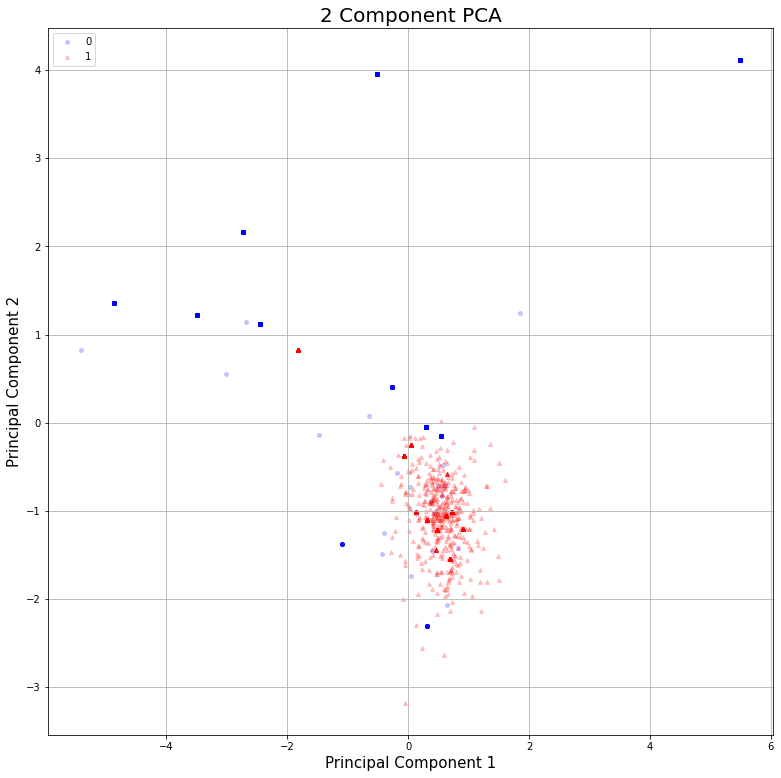

In [293]:
labels = [0,1]
colors = ['b', 'r']
markers = ['o', '^']



fig = plt.figure(figsize = (13,13))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)

for label, color, marker in zip(labels, colors, markers):
  indicesToKeep = finalDataFrame['info'] == label
  ax.scatter(finalDataFrame.loc[indicesToKeep, 'principal component 1']
               , finalDataFrame.loc[indicesToKeep, 'principal component 2']
               , c = color
               , alpha = 0.2
               , marker = marker
               , s = 15)

ax.legend(labels)
ax.grid()

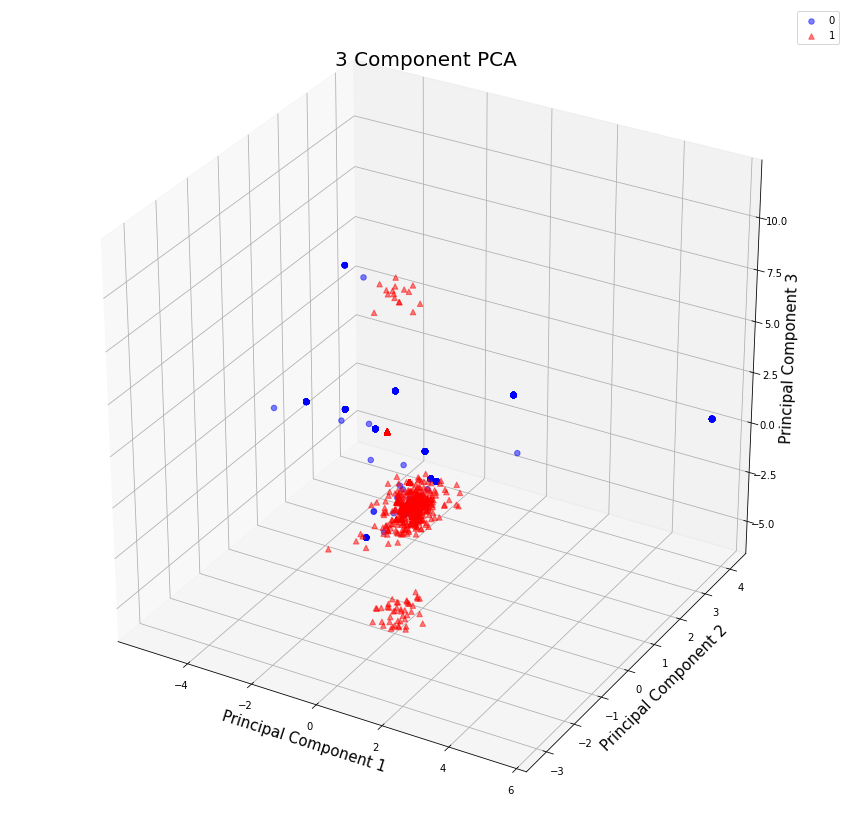

In [294]:
from mpl_toolkits.mplot3d import Axes3D

fig2 = plt.figure(figsize=(15,15))
ax2 = fig2.add_subplot(111, projection='3d')

ax2.set_xlabel('Principal Component 1', fontsize = 15)
ax2.set_ylabel('Principal Component 2', fontsize = 15)
ax2.set_zlabel('Principal Component 3', fontsize = 15)
ax2.set_title('3 Component PCA', fontsize = 20)

labels = [0,1]
colors = ['b', 'r']
markers = ['o', '^']

for label, color, marker in zip(labels, colors, markers):
  indicesToKeep = finalDataFrame2['info'] == label
  ax2.scatter(finalDataFrame2.loc[indicesToKeep, 'principal component 1']
               , finalDataFrame2.loc[indicesToKeep, 'principal component 2']
               , finalDataFrame2.loc[indicesToKeep, 'principal component 3']
               , c = color
               , marker=marker
               , alpha = 0.5
               , s = 30)

ax2.legend(labels)
ax2.grid()

# PCA2  
자력센서와 광센서를 제거한 버전, train 데이터 이용

Physics Toolbox 데이터 변수 설명  
중력가속도 : gFx, gFy, gFz  
리니어 가속도 : ax, ay, az  
자이로스코프 : wx, wy, wz  
자력 : Bx, By, Bz  
광도 : l  

In [295]:
# 자력센서와 광센서는 제거한 버전

X_train =  sensor_a.drop(['time','Bx', 'By', 'Bz','I','info'], axis=1)
X_valid =  sensor_v.drop(['time','Bx', 'By', 'Bz','I','info'], axis=1)

Y_train = sensor_a['info']
Y_valid = sensor_v['info']

Text(0, 0.5, 'Cumulative explained variance')

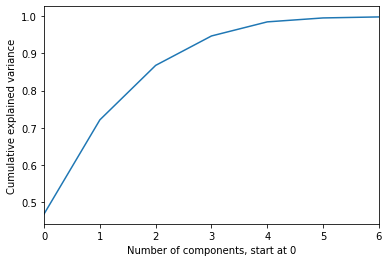

In [296]:
from sklearn.decomposition import PCA

pca = PCA(random_state=222)

pca_components = pca.fit_transform(X_train)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,6,1)
plt.xlabel('Number of components, start at 0')
plt.ylabel('Cumulative explained variance')

Text(0, 0.5, 'Cumulative explained variance')

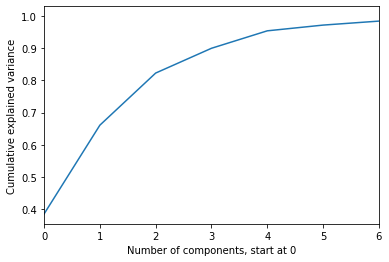

In [297]:
from sklearn.preprocessing import StandardScaler

X_scaled = StandardScaler().fit_transform(X_train)

pca = PCA(random_state=222)

pca_components = pca.fit_transform(X_scaled)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,6,1)
plt.xlabel('Number of components, start at 0')
plt.ylabel('Cumulative explained variance')

## 스케일링 없이 주성분으로 이루어진 데이터프레임 생성 과 그래프

In [298]:
pca = PCA(n_components = 2, random_state=222)

pca_components = pca.fit_transform(X_train)

principalDf = pd.DataFrame(data = pca_components
             , columns = ['principal component 1', 'principal component 2'])

finalDataFrame = pd.concat([principalDf, Y_train], axis=1)

In [299]:
pca2 = PCA(n_components = 3, random_state=222)

pca_components2 = pca2.fit_transform(X_train)

principalDf2 = pd.DataFrame(data = pca_components2
             , columns = ['principal component 1', 'principal component 2', 'principal component 3'])

finalDataFrame2 = pd.concat([principalDf2, Y_train], axis=1)

In [300]:
print(finalDataFrame.shape)
print(finalDataFrame2.shape)
print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_))
print(pca2.explained_variance_ratio_)
print(sum(pca2.explained_variance_ratio_))

(2462, 3)
(2462, 4)
[0.46842029 0.25297962]
0.7213999154395425
[0.46842029 0.25297962 0.1464882 ]
0.867888118052556


In [301]:
finalDataFrame.head()

,principal component 1,principal component 2,info
0,0.383759,-0.648452,1
1,0.177603,-1.076683,1
2,-0.289699,-0.763961,1
3,1.443838,-1.702406,1
4,-1.101320,-0.647407,1


In [302]:
finalDataFrame2.head()

,principal component 1,principal component 2,principal component 3,info
0,0.383759,-0.648452,-0.390604,1
1,0.177603,-1.076683,-0.917448,1
2,-0.289699,-0.763961,-1.418964,1
3,1.443838,-1.702406,-0.403532,1
4,-1.101320,-0.647407,-0.963297,1


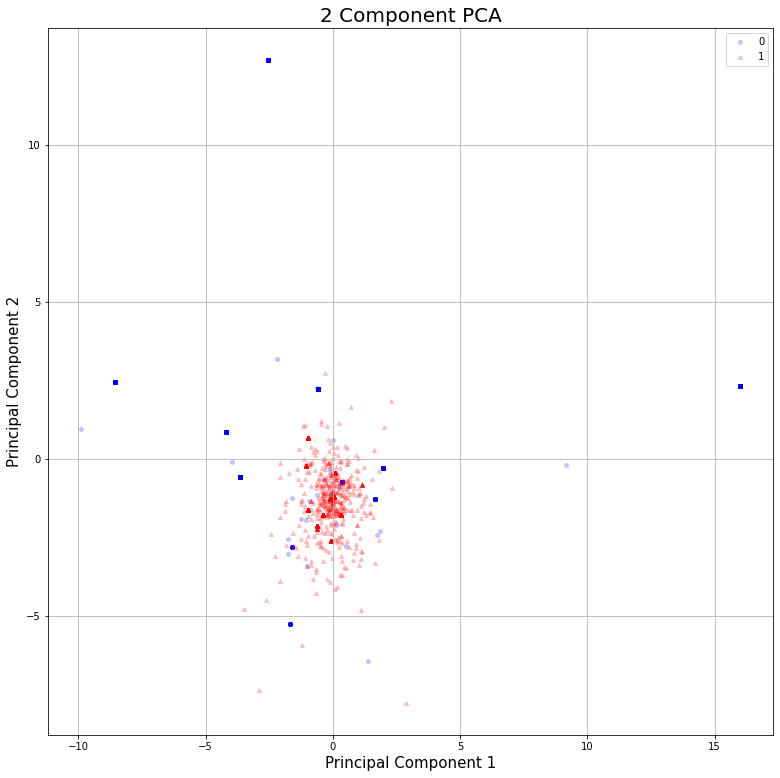

In [303]:
labels = [0,1]
colors = ['b', 'r']
markers = ['o', '^']



fig = plt.figure(figsize = (13,13))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)

for label, color, marker in zip(labels, colors, markers):
  indicesToKeep = finalDataFrame['info'] == label
  ax.scatter(finalDataFrame.loc[indicesToKeep, 'principal component 1']
               , finalDataFrame.loc[indicesToKeep, 'principal component 2']
               , c = color
               , alpha = 0.2
               , marker = marker
               , s = 15)

ax.legend(labels)
ax.grid()

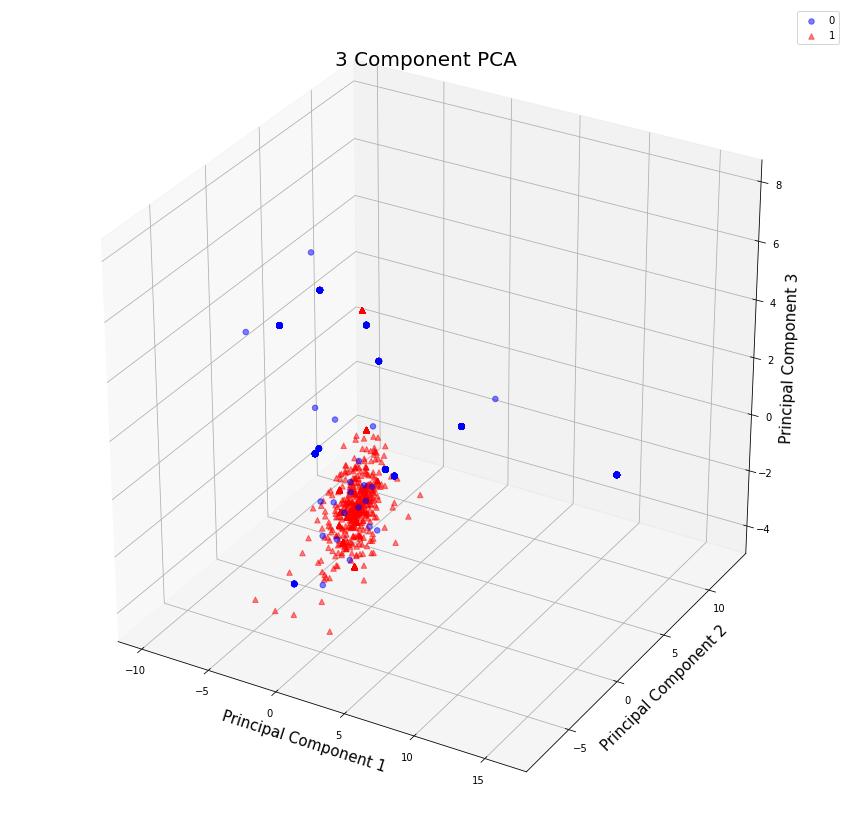

In [304]:
from mpl_toolkits.mplot3d import Axes3D

fig2 = plt.figure(figsize=(15,15))
ax2 = fig2.add_subplot(111, projection='3d')

ax2.set_xlabel('Principal Component 1', fontsize = 15)
ax2.set_ylabel('Principal Component 2', fontsize = 15)
ax2.set_zlabel('Principal Component 3', fontsize = 15)
ax2.set_title('3 Component PCA', fontsize = 20)

labels = [0,1]
colors = ['b', 'r']
markers = ['o', '^']

for label, color, marker in zip(labels, colors, markers):
  indicesToKeep = finalDataFrame2['info'] == label
  ax2.scatter(finalDataFrame2.loc[indicesToKeep, 'principal component 1']
               , finalDataFrame2.loc[indicesToKeep, 'principal component 2']
               , finalDataFrame2.loc[indicesToKeep, 'principal component 3']
               , c = color
               , marker=marker
               , alpha = 0.5
               , s = 30)

ax2.legend(labels)
ax2.grid()

## 스케일링 후 주성분으로 이루어진 데이터프레임 생성 과 그래프

In [305]:
from sklearn.preprocessing import StandardScaler

X_scaled = StandardScaler().fit_transform(X_train)
X_valid_scaled = StandardScaler().fit_transform(X_valid)

In [306]:
pca = PCA(n_components = 2, random_state=222)

pca_components = pca.fit_transform(X_scaled)

principalDf = pd.DataFrame(data = pca_components
             , columns = ['principal component 1', 'principal component 2'])

finalDataFrame = pd.concat([principalDf, Y_train], axis=1)

In [307]:
pca2 = PCA(n_components = 3, random_state=222)

pca_components2 = pca2.fit_transform(X_scaled)

principalDf2 = pd.DataFrame(data = pca_components2
             , columns = ['principal component 1', 'principal component 2', 'principal component 3'])

finalDataFrame2 = pd.concat([principalDf2, Y_train], axis=1)

In [308]:
print(finalDataFrame.shape)
print(finalDataFrame2.shape)
print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_))
print(pca2.explained_variance_ratio_)
print(sum(pca2.explained_variance_ratio_))

(2462, 3)
(2462, 4)
[0.384278   0.27641213]
0.660690124072584
[0.384278   0.27641213 0.16236384]
0.8230539681648705


In [309]:
finalDataFrame.head()

,principal component 1,principal component 2,info
0,0.172171,-0.556211,1
1,0.414556,-0.849038,1
2,0.423292,-0.936806,1
3,0.903639,-0.820677,1
4,0.100206,-1.036730,1


In [310]:
finalDataFrame2.head()

,principal component 1,principal component 2,principal component 3,info
0,0.172171,-0.556211,-0.214744,1
1,0.414556,-0.849038,-0.165236,1
2,0.423292,-0.936806,0.193227,1
3,0.903639,-0.820677,-0.509216,1
4,0.100206,-1.036730,0.196959,1


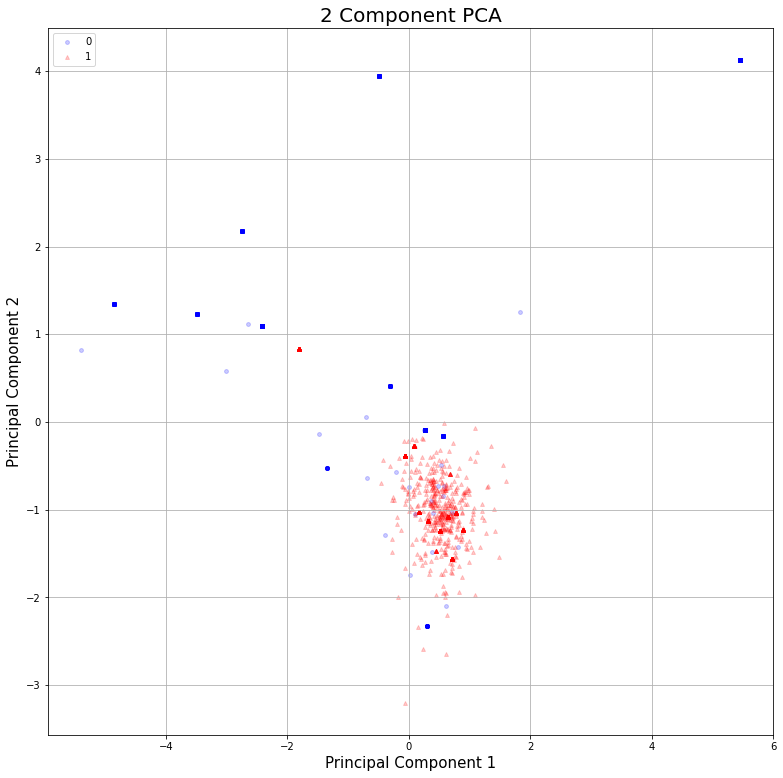

In [311]:
labels = [0,1]
colors = ['b', 'r']
markers = ['o', '^']



fig = plt.figure(figsize = (13,13))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)

for label, color, marker in zip(labels, colors, markers):
  indicesToKeep = finalDataFrame['info'] == label
  ax.scatter(finalDataFrame.loc[indicesToKeep, 'principal component 1']
               , finalDataFrame.loc[indicesToKeep, 'principal component 2']
               , c = color
               , alpha = 0.2
               , marker = marker
               , s = 15)

ax.legend(labels)
ax.grid()

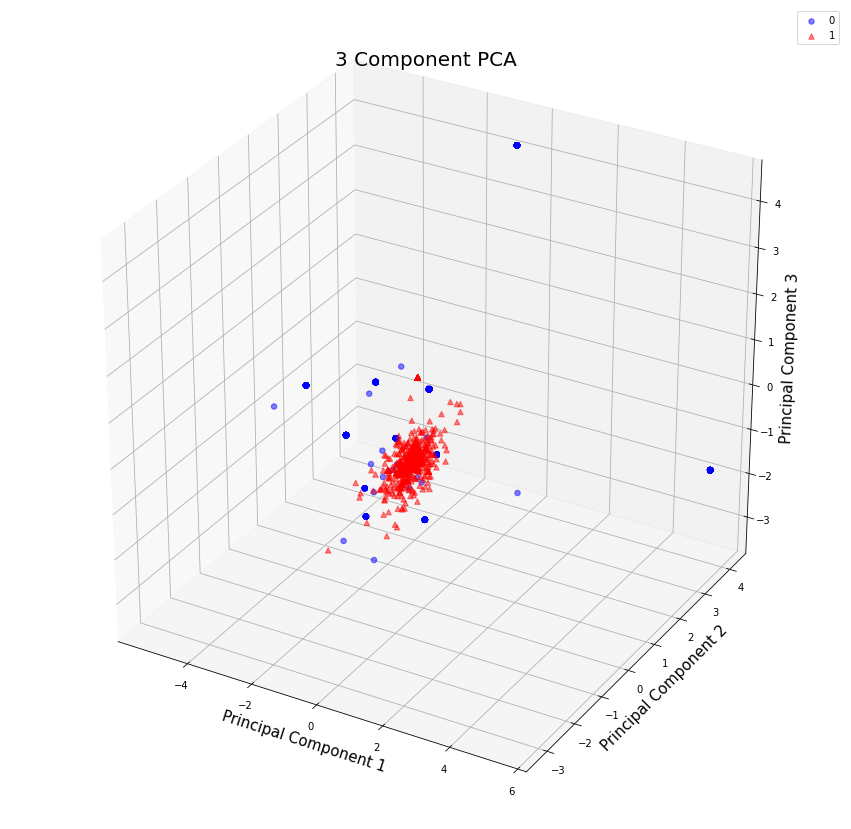

In [312]:
from mpl_toolkits.mplot3d import Axes3D

fig2 = plt.figure(figsize=(15,15))
ax2 = fig2.add_subplot(111, projection='3d')

ax2.set_xlabel('Principal Component 1', fontsize = 15)
ax2.set_ylabel('Principal Component 2', fontsize = 15)
ax2.set_zlabel('Principal Component 3', fontsize = 15)
ax2.set_title('3 Component PCA', fontsize = 20)

labels = [0,1]
colors = ['b', 'r']
markers = ['o', '^']

for label, color, marker in zip(labels, colors, markers):
  indicesToKeep = finalDataFrame2['info'] == label
  ax2.scatter(finalDataFrame2.loc[indicesToKeep, 'principal component 1']
               , finalDataFrame2.loc[indicesToKeep, 'principal component 2']
               , finalDataFrame2.loc[indicesToKeep, 'principal component 3']
               , c = color
               , marker=marker
               , alpha = 0.5
               , s = 30)

ax2.legend(labels)
ax2.grid()

# PCA3  
광센서를 제거한 버전, valid 데이터 이용

Physics Toolbox 데이터 변수 설명  
중력가속도 : gFx, gFy, gFz  
리니어 가속도 : ax, ay, az  
자이로스코프 : wx, wy, wz  
자력 : Bx, By, Bz  
광도 : l  

In [313]:
# 광센서는 제거한 버전

X_train =  sensor_a.drop(['time','I','info'], axis=1)
X_valid =  sensor_v.drop(['time','I','info'], axis=1)

Y_train = sensor_a['info']
Y_valid = sensor_v['info']

Text(0, 0.5, 'Cumulative explained variance')

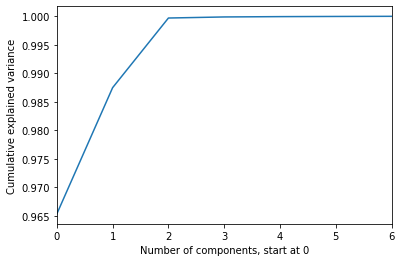

In [314]:
from sklearn.decomposition import PCA

pca = PCA(random_state=222)

pca_components = pca.fit_transform(X_valid)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,6,1)
plt.xlabel('Number of components, start at 0')
plt.ylabel('Cumulative explained variance')

Text(0, 0.5, 'Cumulative explained variance')

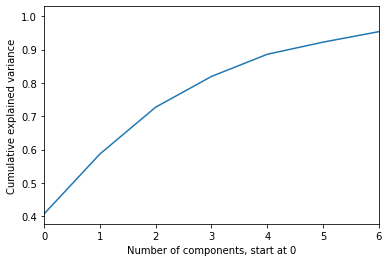

In [315]:
from sklearn.preprocessing import StandardScaler

X_scaled = StandardScaler().fit_transform(X_valid)

pca = PCA(random_state=222)

pca_components = pca.fit_transform(X_scaled)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,6,1)
plt.xlabel('Number of components, start at 0')
plt.ylabel('Cumulative explained variance')

## 스케일링 없이 주성분으로 이루어진 데이터프레임 생성 과 그래프

In [316]:
pca = PCA(n_components = 2, random_state=222)

pca_components = pca.fit_transform(X_valid)

principalDf = pd.DataFrame(data = pca_components
             , columns = ['principal component 1', 'principal component 2'])

finalDataFrame = pd.concat([principalDf, Y_valid], axis=1)

In [317]:
pca2 = PCA(n_components = 3, random_state=222)

pca_components2 = pca2.fit_transform(X_valid)

principalDf2 = pd.DataFrame(data = pca_components2
             , columns = ['principal component 1', 'principal component 2', 'principal component 3'])

finalDataFrame2 = pd.concat([principalDf2, Y_valid], axis=1)

In [318]:
print(finalDataFrame.shape)
print(finalDataFrame2.shape)
print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_))
print(pca2.explained_variance_ratio_)
print(sum(pca2.explained_variance_ratio_))

(1683, 3)
(1683, 4)
[0.96534136 0.02213587]
0.9874772353528354
[0.96534136 0.02213587 0.01221122]
0.9996884511809088


In [319]:
finalDataFrame.head()

,principal component 1,principal component 2,info
0,-156.409113,-5.014726,1
1,-158.370452,-7.386242,1
2,-148.081033,0.196489,1
3,-144.546943,4.500774,1
4,-150.857667,0.886231,1


In [320]:
finalDataFrame2.head()

,principal component 1,principal component 2,principal component 3,info
0,-156.409113,-5.014726,16.822388,1
1,-158.370452,-7.386242,14.434277,1
2,-148.081033,0.196489,19.195064,1
3,-144.546943,4.500774,20.370742,1
4,-150.857667,0.886231,19.505704,1


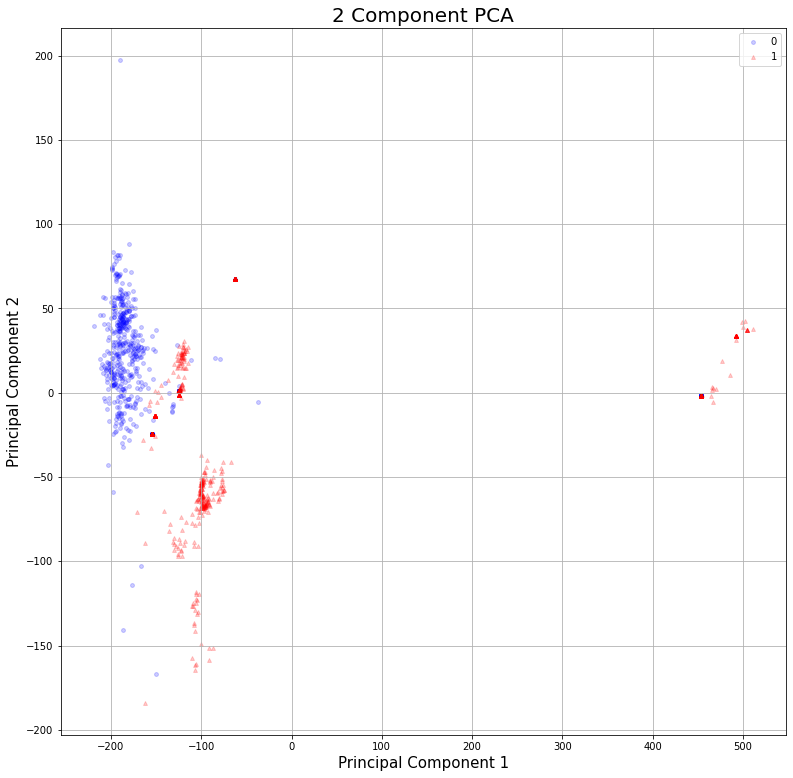

In [321]:
labels = [0,1]
colors = ['b', 'r']
markers = ['o', '^']



fig = plt.figure(figsize = (13,13))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)

for label, color, marker in zip(labels, colors, markers):
  indicesToKeep = finalDataFrame['info'] == label
  ax.scatter(finalDataFrame.loc[indicesToKeep, 'principal component 1']
               , finalDataFrame.loc[indicesToKeep, 'principal component 2']
               , c = color
               , alpha = 0.2
               , marker = marker
               , s = 15)

ax.legend(labels)
ax.grid()

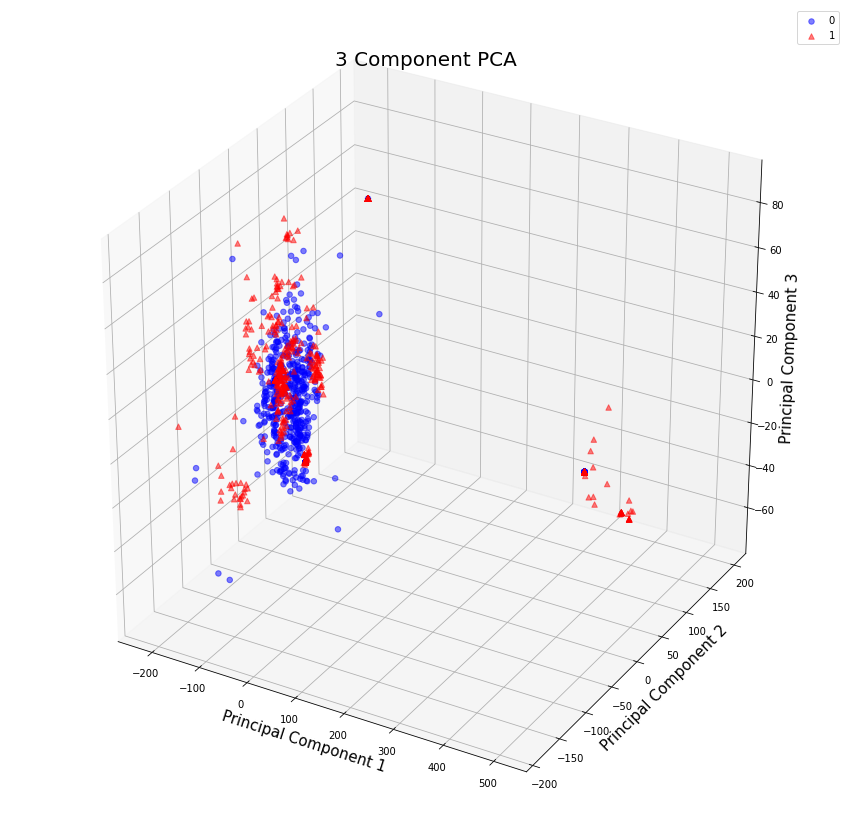

In [322]:
from mpl_toolkits.mplot3d import Axes3D

fig2 = plt.figure(figsize=(15,15))
ax2 = fig2.add_subplot(111, projection='3d')

ax2.set_xlabel('Principal Component 1', fontsize = 15)
ax2.set_ylabel('Principal Component 2', fontsize = 15)
ax2.set_zlabel('Principal Component 3', fontsize = 15)
ax2.set_title('3 Component PCA', fontsize = 20)

labels = [0,1]
colors = ['b', 'r']
markers = ['o', '^']

for label, color, marker in zip(labels, colors, markers):
  indicesToKeep = finalDataFrame2['info'] == label
  ax2.scatter(finalDataFrame2.loc[indicesToKeep, 'principal component 1']
               , finalDataFrame2.loc[indicesToKeep, 'principal component 2']
               , finalDataFrame2.loc[indicesToKeep, 'principal component 3']
               , c = color
               , marker=marker
               , alpha = 0.5
               , s = 30)

ax2.legend(labels)
ax2.grid()

## 스케일링 후 주성분으로 이루어진 데이터프레임 생성 과 그래프

In [323]:
pca = PCA(n_components = 2, random_state=222)

pca_components = pca.fit_transform(X_valid_scaled)

principalDf = pd.DataFrame(data = pca_components
             , columns = ['principal component 1', 'principal component 2'])

finalDataFrame = pd.concat([principalDf, Y_train], axis=1)

In [324]:
pca2 = PCA(n_components = 3, random_state=222)

pca_components2 = pca2.fit_transform(X_valid_scaled)

principalDf2 = pd.DataFrame(data = pca_components2
             , columns = ['principal component 1', 'principal component 2', 'principal component 3'])

finalDataFrame2 = pd.concat([principalDf2, Y_train], axis=1)

In [325]:
print(finalDataFrame.shape)
print(finalDataFrame2.shape)
print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_))
print(pca2.explained_variance_ratio_)
print(sum(pca2.explained_variance_ratio_))

(2462, 3)
(2462, 4)
[0.3676502  0.19819445]
0.5658446511642631
[0.3676502  0.19819445 0.13871748]
0.7045621335919984


In [326]:
finalDataFrame.head()

,principal component 1,principal component 2,info
0,-0.616368,0.121050,1
1,-0.719739,-0.600113,1
2,-0.599456,-0.563916,1
3,-1.067362,-0.189416,1
4,0.056448,-0.208563,1


In [327]:
finalDataFrame2.head()

,principal component 1,principal component 2,principal component 3,info
0,-0.616368,0.121050,0.538330,1
1,-0.719739,-0.600113,0.127390,1
2,-0.599456,-0.563916,0.063856,1
3,-1.067362,-0.189416,0.012514,1
4,0.056448,-0.208563,0.894860,1


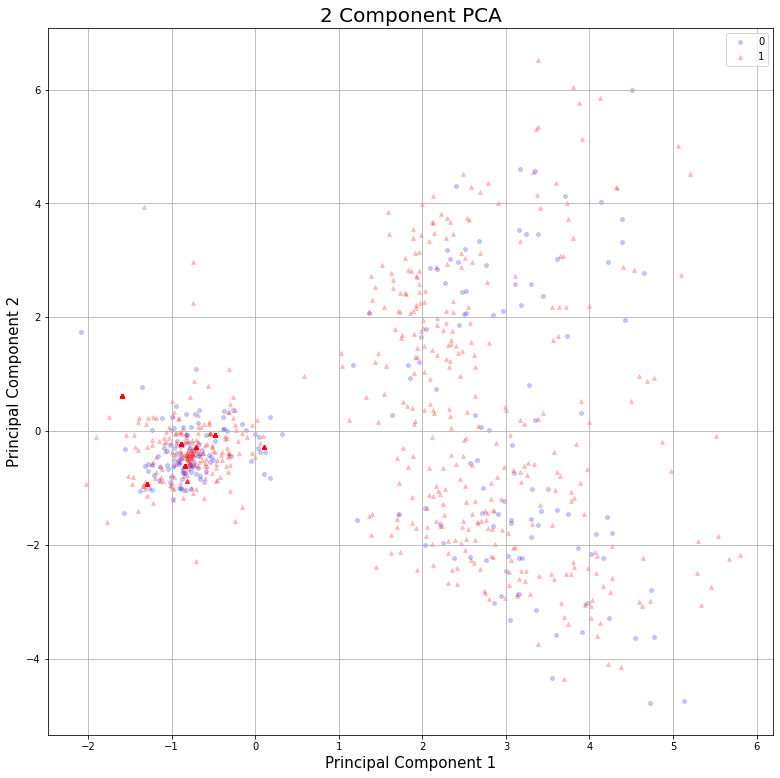

In [328]:
labels = [0,1]
colors = ['b', 'r']
markers = ['o', '^']



fig = plt.figure(figsize = (13,13))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)

for label, color, marker in zip(labels, colors, markers):
  indicesToKeep = finalDataFrame['info'] == label
  ax.scatter(finalDataFrame.loc[indicesToKeep, 'principal component 1']
               , finalDataFrame.loc[indicesToKeep, 'principal component 2']
               , c = color
               , alpha = 0.2
               , marker = marker
               , s = 15)

ax.legend(labels)
ax.grid()

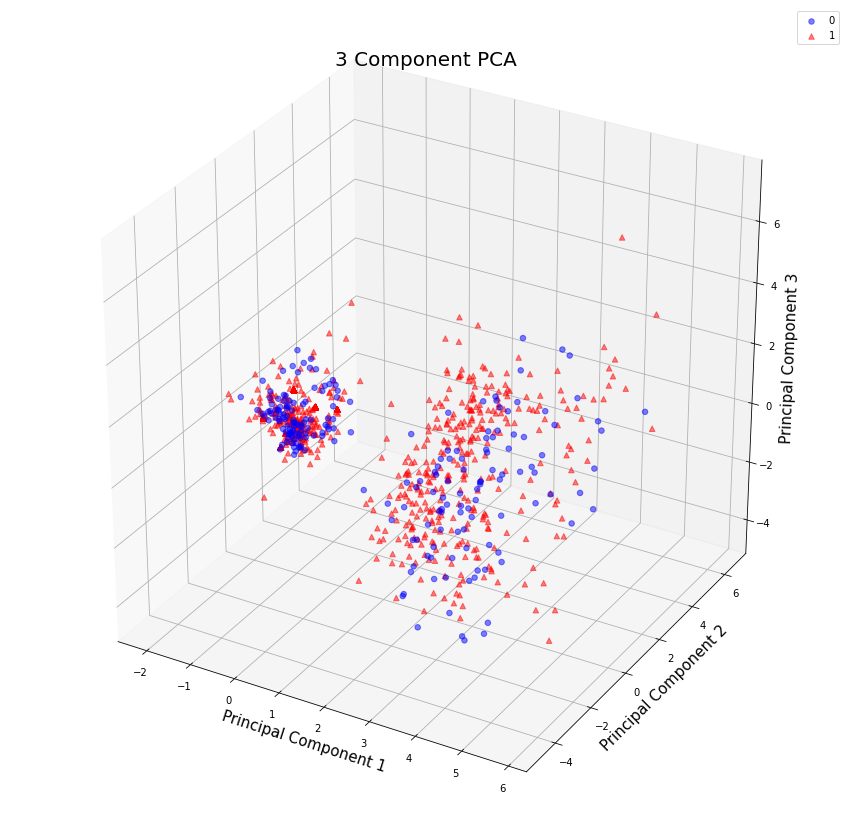

In [329]:
from mpl_toolkits.mplot3d import Axes3D

fig2 = plt.figure(figsize=(15,15))
ax2 = fig2.add_subplot(111, projection='3d')

ax2.set_xlabel('Principal Component 1', fontsize = 15)
ax2.set_ylabel('Principal Component 2', fontsize = 15)
ax2.set_zlabel('Principal Component 3', fontsize = 15)
ax2.set_title('3 Component PCA', fontsize = 20)

labels = [0,1]
colors = ['b', 'r']
markers = ['o', '^']

for label, color, marker in zip(labels, colors, markers):
  indicesToKeep = finalDataFrame2['info'] == label
  ax2.scatter(finalDataFrame2.loc[indicesToKeep, 'principal component 1']
               , finalDataFrame2.loc[indicesToKeep, 'principal component 2']
               , finalDataFrame2.loc[indicesToKeep, 'principal component 3']
               , c = color
               , marker=marker
               , alpha = 0.5
               , s = 30)

ax2.legend(labels)
ax2.grid()

# PCA4  
자력센서와 광센서를 제거한 버전, valid 데이터 이용

Physics Toolbox 데이터 변수 설명  
중력가속도 : gFx, gFy, gFz  
리니어 가속도 : ax, ay, az  
자이로스코프 : wx, wy, wz  
자력 : Bx, By, Bz  
광도 : l  

In [330]:
# 자력센서와 광센서는 제거한 버전

X_train =  sensor_a.drop(['time','Bx', 'By', 'Bz','I','info'], axis=1)
X_valid =  sensor_v.drop(['time','Bx', 'By', 'Bz','I','info'], axis=1)

Y_train = sensor_a['info']
Y_valid = sensor_v['info']

Text(0, 0.5, 'Cumulative explained variance')

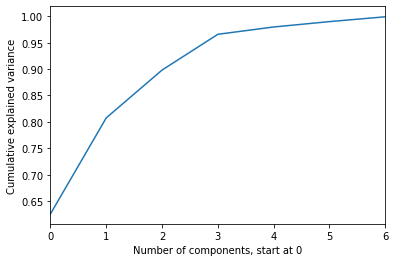

In [331]:
from sklearn.decomposition import PCA

pca = PCA(random_state=222)

pca_components = pca.fit_transform(X_valid)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,6,1)
plt.xlabel('Number of components, start at 0')
plt.ylabel('Cumulative explained variance')

Text(0, 0.5, 'Cumulative explained variance')

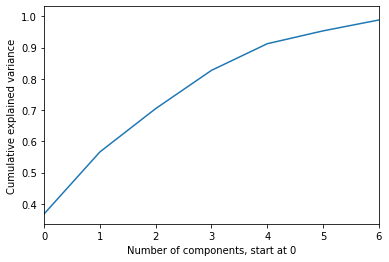

In [332]:
from sklearn.preprocessing import StandardScaler

X_scaled = StandardScaler().fit_transform(X_valid)

pca = PCA(random_state=222)

pca_components = pca.fit_transform(X_scaled)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,6,1)
plt.xlabel('Number of components, start at 0')
plt.ylabel('Cumulative explained variance')

## 스케일링 없이 주성분으로 이루어진 데이터프레임 생성 과 그래프

In [333]:
pca = PCA(n_components = 2, random_state=222)

pca_components = pca.fit_transform(X_valid)

principalDf = pd.DataFrame(data = pca_components
             , columns = ['principal component 1', 'principal component 2'])

finalDataFrame = pd.concat([principalDf, Y_valid], axis=1)

In [334]:
pca2 = PCA(n_components = 3, random_state=222)

pca_components2 = pca2.fit_transform(X_valid)

principalDf2 = pd.DataFrame(data = pca_components2
             , columns = ['principal component 1', 'principal component 2', 'principal component 3'])

finalDataFrame2 = pd.concat([principalDf2, Y_valid], axis=1)

In [335]:
print(finalDataFrame.shape)
print(finalDataFrame2.shape)
print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_))
print(pca2.explained_variance_ratio_)
print(sum(pca2.explained_variance_ratio_))

(1683, 3)
(1683, 4)
[0.62586606 0.18175972]
0.8076257758025691
[0.62586606 0.18175972 0.09049609]
0.8981218653424654


In [336]:
finalDataFrame.head()

,principal component 1,principal component 2,info
0,-0.274138,0.235796,1
1,0.641275,-1.156039,1
2,-0.932369,-0.308089,1
3,-1.524864,-0.702637,1
4,1.324327,0.260326,1


In [337]:
finalDataFrame2.head()

,principal component 1,principal component 2,principal component 3,info
0,-0.274138,0.235796,-0.100206,1
1,0.641275,-1.156039,-0.743641,1
2,-0.932369,-0.308089,0.860720,1
3,-1.524864,-0.702637,-0.070815,1
4,1.324327,0.260326,1.178710,1


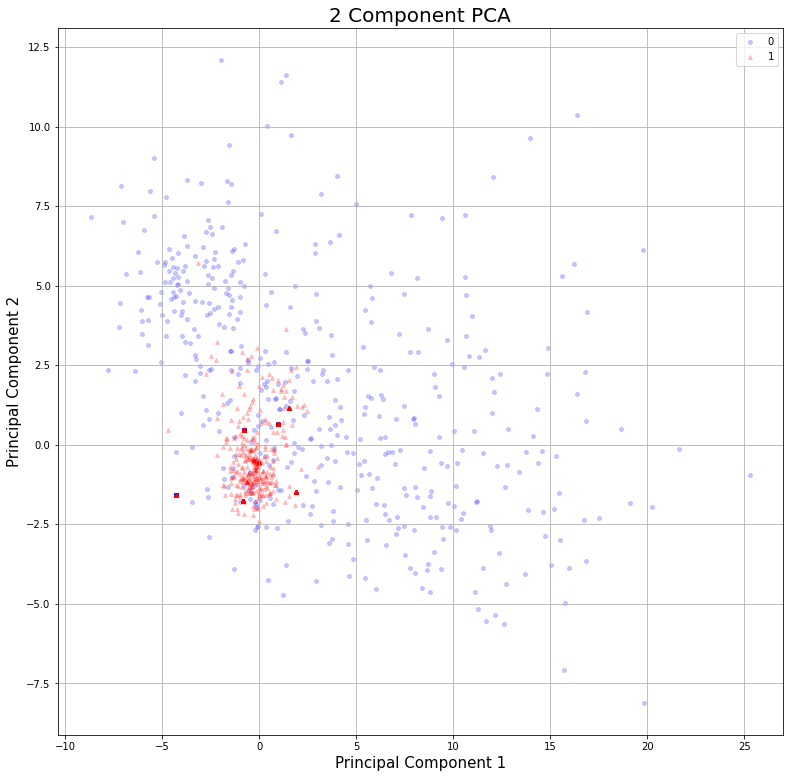

In [338]:
labels = [0,1]
colors = ['b', 'r']
markers = ['o', '^']



fig = plt.figure(figsize = (13,13))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)

for label, color, marker in zip(labels, colors, markers):
  indicesToKeep = finalDataFrame['info'] == label
  ax.scatter(finalDataFrame.loc[indicesToKeep, 'principal component 1']
               , finalDataFrame.loc[indicesToKeep, 'principal component 2']
               , c = color
               , alpha = 0.2
               , marker = marker
               , s = 15)

ax.legend(labels)
ax.grid()

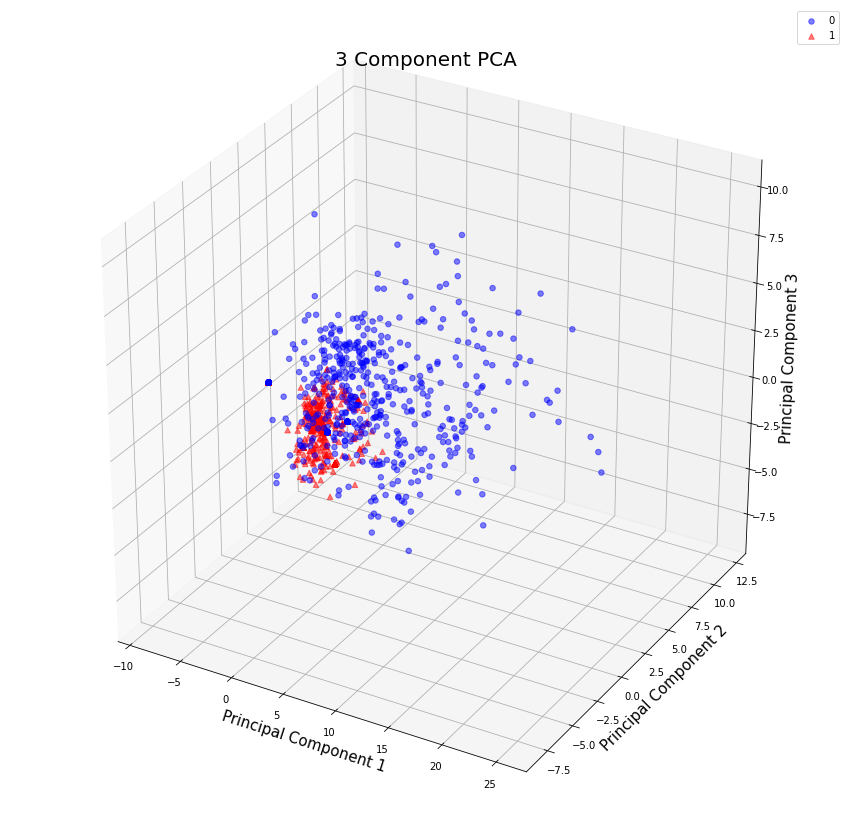

In [339]:
from mpl_toolkits.mplot3d import Axes3D

fig2 = plt.figure(figsize=(15,15))
ax2 = fig2.add_subplot(111, projection='3d')

ax2.set_xlabel('Principal Component 1', fontsize = 15)
ax2.set_ylabel('Principal Component 2', fontsize = 15)
ax2.set_zlabel('Principal Component 3', fontsize = 15)
ax2.set_title('3 Component PCA', fontsize = 20)

labels = [0,1]
colors = ['b', 'r']
markers = ['o', '^']

for label, color, marker in zip(labels, colors, markers):
  indicesToKeep = finalDataFrame2['info'] == label
  ax2.scatter(finalDataFrame2.loc[indicesToKeep, 'principal component 1']
               , finalDataFrame2.loc[indicesToKeep, 'principal component 2']
               , finalDataFrame2.loc[indicesToKeep, 'principal component 3']
               , c = color
               , marker=marker
               , alpha = 0.5
               , s = 30)

ax2.legend(labels)
ax2.grid()

## 스케일링 후 주성분으로 이루어진 데이터프레임 생성 과 그래프

In [340]:
from sklearn.preprocessing import StandardScaler

X_scaled = StandardScaler().fit_transform(X_train)
X_valid_scaled = StandardScaler().fit_transform(X_valid)

In [341]:
pca = PCA(n_components = 2, random_state=222)

pca_components = pca.fit_transform(X_valid_scaled)

principalDf = pd.DataFrame(data = pca_components
             , columns = ['principal component 1', 'principal component 2'])

finalDataFrame = pd.concat([principalDf, Y_train], axis=1)

In [342]:
pca2 = PCA(n_components = 3, random_state=222)

pca_components2 = pca2.fit_transform(X_valid_scaled)

principalDf2 = pd.DataFrame(data = pca_components2
             , columns = ['principal component 1', 'principal component 2', 'principal component 3'])

finalDataFrame2 = pd.concat([principalDf2, Y_train], axis=1)

In [343]:
print(finalDataFrame.shape)
print(finalDataFrame2.shape)
print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_))
print(pca2.explained_variance_ratio_)
print(sum(pca2.explained_variance_ratio_))

(2462, 3)
(2462, 4)
[0.3676502  0.19819445]
0.5658446511642631
[0.3676502  0.19819445 0.13871748]
0.7045621335919984


In [344]:
finalDataFrame.head()

,principal component 1,principal component 2,info
0,-0.616368,0.121050,1
1,-0.719739,-0.600113,1
2,-0.599456,-0.563916,1
3,-1.067362,-0.189416,1
4,0.056448,-0.208563,1


In [345]:
finalDataFrame2.head()

,principal component 1,principal component 2,principal component 3,info
0,-0.616368,0.121050,0.538330,1
1,-0.719739,-0.600113,0.127390,1
2,-0.599456,-0.563916,0.063856,1
3,-1.067362,-0.189416,0.012514,1
4,0.056448,-0.208563,0.894860,1


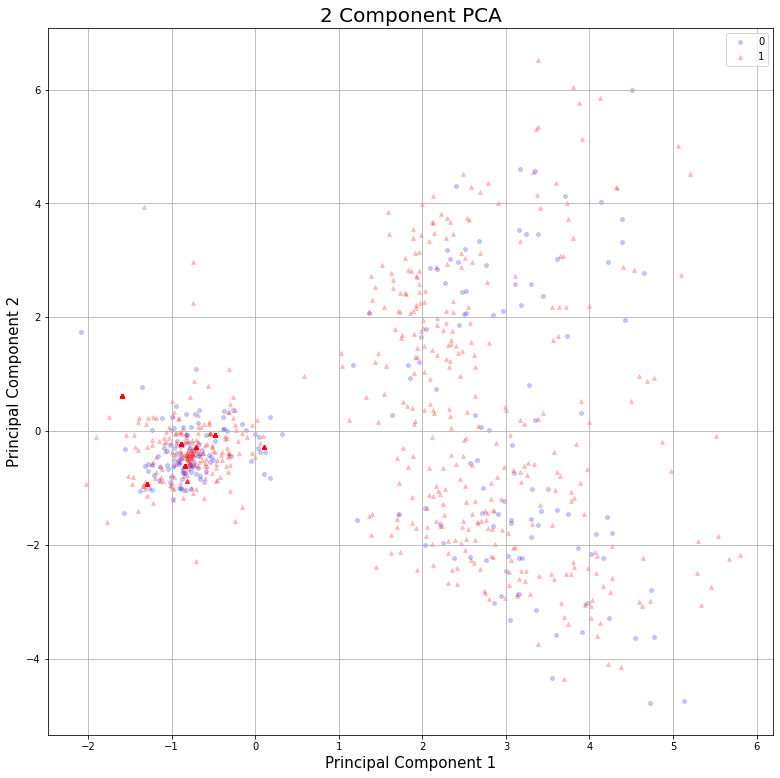

In [346]:
labels = [0,1]
colors = ['b', 'r']
markers = ['o', '^']



fig = plt.figure(figsize = (13,13))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)

for label, color, marker in zip(labels, colors, markers):
  indicesToKeep = finalDataFrame['info'] == label
  ax.scatter(finalDataFrame.loc[indicesToKeep, 'principal component 1']
               , finalDataFrame.loc[indicesToKeep, 'principal component 2']
               , c = color
               , alpha = 0.2
               , marker = marker
               , s = 15)

ax.legend(labels)
ax.grid()

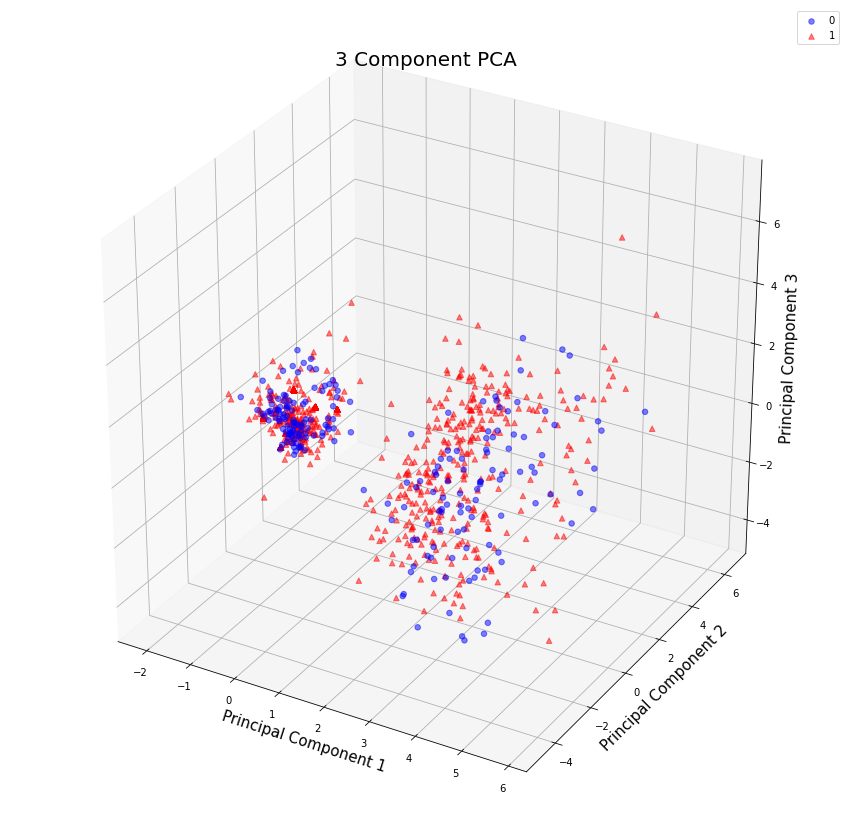

In [347]:
from mpl_toolkits.mplot3d import Axes3D

fig2 = plt.figure(figsize=(15,15))
ax2 = fig2.add_subplot(111, projection='3d')

ax2.set_xlabel('Principal Component 1', fontsize = 15)
ax2.set_ylabel('Principal Component 2', fontsize = 15)
ax2.set_zlabel('Principal Component 3', fontsize = 15)
ax2.set_title('3 Component PCA', fontsize = 20)

labels = [0,1]
colors = ['b', 'r']
markers = ['o', '^']

for label, color, marker in zip(labels, colors, markers):
  indicesToKeep = finalDataFrame2['info'] == label
  ax2.scatter(finalDataFrame2.loc[indicesToKeep, 'principal component 1']
               , finalDataFrame2.loc[indicesToKeep, 'principal component 2']
               , finalDataFrame2.loc[indicesToKeep, 'principal component 3']
               , c = color
               , marker=marker
               , alpha = 0.5
               , s = 30)

ax2.legend(labels)
ax2.grid()